In [17]:
import pandas as pd

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

Start with the most straightforward correlation - PyR0 last week with PyR0 this week

In [19]:
def corr(x, y, df):
    series1 = df[[x,y]].dropna()[x]
    series2 = df[[x,y]].dropna()[y]
    R, p = pearsonr(series1, series2)
    return R, p

def plot(x, y, df):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    for ax in axes:
        x, y = y, x
        R, p = corr(x,y,df)
        sns.regplot(x=x,
                    y=y,
                    data=df,
                    label='R={:.2f}\np={:.2e}'.format(R,p),
                    ax=ax);
        ax.legend()


        ax.set_title(f'{x} vs. {y} on {len(df[[x,y]].drop_duplicates())} mutations');

In [18]:
pearsonr(df['R / R_A Week 1'], df['R / R_A Week 2'])

PearsonRResult(statistic=0.9765117945322084, pvalue=0.0)

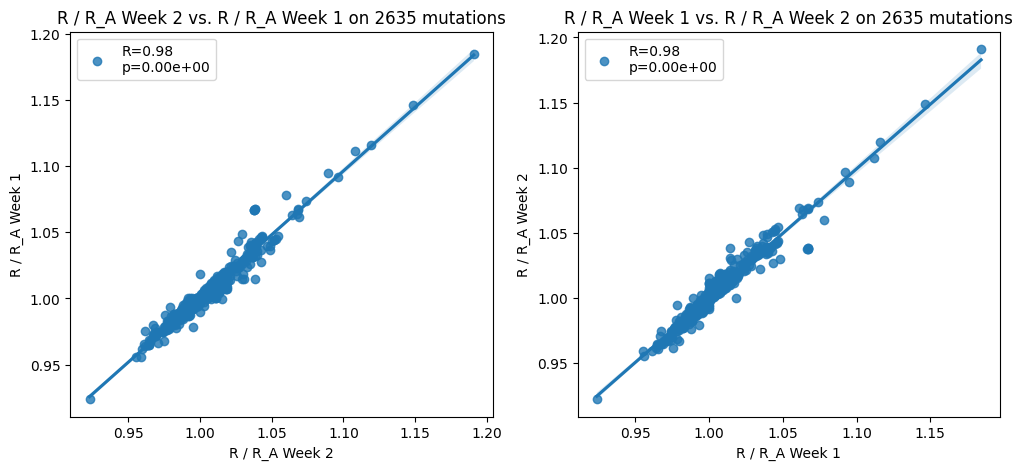

In [20]:
pyro = pd.read_csv('PyR0_Ranked_Mutations.tsv', sep='\t')
pyro1 = pyro[pyro['Run date']=='2023-12-13']
pyro2 = pyro[pyro['Run date']=='2024-01-04']
df = pd.merge(pyro1, pyro2, on='mutation', suffixes=[' Week 1', ' Week 2'])

plot('R / R_A Week 1', 'R / R_A Week 2', df)

In [9]:
pyro['Run date'].drop_duplicates().tail()

138186    2023-11-03
141914    2023-11-17
145642    2023-11-28
149370    2023-12-13
153098    2024-01-04
Name: Run date, dtype: object

In [11]:
pyro

,rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,Run date
0,1,S:R346K,4611.430,4617700.0,0.094890,0.094850,0.094930,1.099540,1.099490,1.099580,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-12
1,2,M:D3N,3843.020,3207010.0,0.120831,0.120769,0.120892,1.128430,1.128360,1.128500,"B.1.1.529, BA.2 (B.1.1.529.2), BA.5 (B.1.1.529...",2021-03-12
2,3,S:F486V,3180.000,2195890.0,0.116173,0.116101,0.116245,1.123190,1.123110,1.123270,"B.1.1.529, BA.2 (B.1.1.529.2), BA.4 (B.1.1.529...",2021-03-12
3,4,S:L452Q,3034.550,1999600.0,0.095844,0.095782,0.095906,1.100590,1.100520,1.100660,"B.1.1.374, BA.2.12.1 (B.1.1.529.2.12.1), BG.1 ...",2021-03-12
4,5,ORF9b:D16G,2997.790,1951450.0,0.100566,0.100500,0.100631,1.105800,1.105720,1.105870,"B.1, B.1.1.529, B.1.631, BA.5 (B.1.1.529.5), B...",2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...
156885,3788,ORF1a:I2230T,-294.092,-18784.0,-0.006789,-0.006834,-0.006744,0.993234,0.993189,0.993279,"B.1.1.7, Q.1 (B.1.1.7.1), Q.2 (B.1.1.7.2), Q.3...",2024-01-04
156886,3789,S:A570D,-310.162,-20892.5,-0.006844,-0.006887,-0.006801,0.993179,0.993136,0.993222,"B.1.1.7, Q.1 (B.1.1.7.1), Q.2 (B.1.1.7.2), Q.3...",2024-01-04
156887,3790,ORF1a:A1708D,-319.180,-22124.9,-0.006912,-0.006955,-0.006870,0.993112,0.993070,0.993154,"B.1.1.7, Q.1 (B.1.1.7.1), Q.2 (B.1.1.7.2), Q.3...",2024-01-04
156888,3791,ORF1a:T1001I,-319.782,-22208.5,-0.006956,-0.006998,-0.006913,0.993068,0.993026,0.993111,"B.1.1.7, B.1.36.29, CR.1.1 (B.1.1.529.5.2.18.1...",2024-01-04
